<a href="https://colab.research.google.com/github/Felipe0Parra/IO/blob/main/OF_Entrega_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrega 2 Introducción a optica de Fourier

### Librerías

In [ ]:
import numpy as np
import scipy as sp
from scipy.fft import fft2
from scipy.fft import ifft2
from scipy.fft import fftfreq
from scipy.fft import fftshift, ifftshift
from scipy.signal import convolve2d

import imageio
import cv2
import os

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import animation
from matplotlib.animation import PillowWriter
import pint

from PIL import Image

u = pint.UnitRegistry()

### Funciones auxiliares

Abrir una URL:

In [ ]:
def URL_ADAP(URL):
    URL = str(URL)
    URL2 = URL.replace('\\', '/')
    return URL2

Normalizar una matriz:

In [ ]:
def normalize_image(image):
    normalized_image = (image - np.min(image)) / (np.max(image) - np.min(image))
    return normalized_image

Calcular intensidad:

In [ ]:
def intensidad_del_campo(campo):
    intensidad_espectro_imagen = np.abs(campo)**2
    return intensidad_espectro_imagen

## Simulaciones para el punto 2

EL objetivo de este bloque es mostrar el efecto de una lente convergente sobre una mascara cualquiera, en este caso en general rejillas, cuando esta está ubicada en el foco anterior de la lente. De manera que en el foco posterior obtenga la transformada de Fourier exacta de la imagen. Por lo cual el primer paso importante es definir mis mascaras, pues el proceso de la transformada surge facilmente usando las librerías.

Definamos los parametros fisicos de nuestro sistema:

## Rejilla con pinholes circulares


La descripción matematica de la rejilla se da medienta la convolución de una función peine con una función circulo, de la misma forma para la rejilla con pinholes rectangulares. Recordemos ademas, que según las propiedades de la transformada de Fourier, la trasnformada de la rejilla, es decir, de nuestra convolución es igual a la multiplicación de los espectros de las funciones convolucionadas. Por lo cual podemos esperar un espectro reproducible y caracterizable.

In [ ]:
tamaño_plano = 2
N_pixels = 2500

In [ ]:
x = np.linspace(-tamaño_plano, tamaño_plano, N_pixels)
xv, yv = np.meshgrid(x, x)

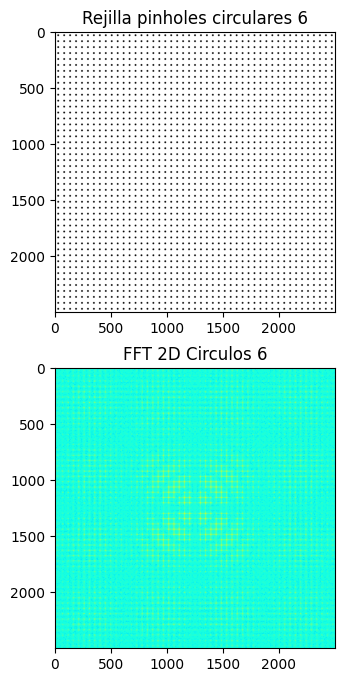

In [ ]:
size_pinhole = 1.3
number_pinholes = 0.085
malla = (0.5 + 0.5 * size_pinhole * np.cos((xv/number_pinholes) * 2 * np.pi)) * (0.5 + 0.5 * size_pinhole * np.cos((yv/number_pinholes) * 2 * np.pi))
peine = np.where(malla > 1, 0, 1)
espectro = fftshift(fft2(peine))
intensidad = np.log(0.0001 + np.abs(espectro)**2)

plt.figure(figsize = (4, 8))
plt.subplot(2, 1, 1)
plt.imshow(peine, cmap = 'gray')
plt.title('Rejilla pinholes circulares 6')

plt.subplot(2, 1, 2)
plt.imshow(intensidad, cmap = 'jet')
plt.title('FFT 2D Circulos 6')


plt.show()

plt.imsave(r'C:\Users\Felipe\Pictures\Optica_Proyecto\Peine_OF_1.png', peine, cmap = 'gray')

Recordemos ademas que todas las imagenes se pueden mostrar escaladas a las unidades correpondientes en mm según los pixeles que tengan, así, o en pixeles con plt. convencional. Sin embargo, es muy importante tener en cuenta que este procedimiento puede reducir significativamente la definición de mi imagen.

Transformada de Fourier de la imagen proyectada en el foco posterior de la lente si la rejilla está en el foco.

Mostrando la intensidad del espectro en el punto focal de la lente, modificada de tal forma que sea visible toda su extensión:

## Prubas de comprobación del espectro

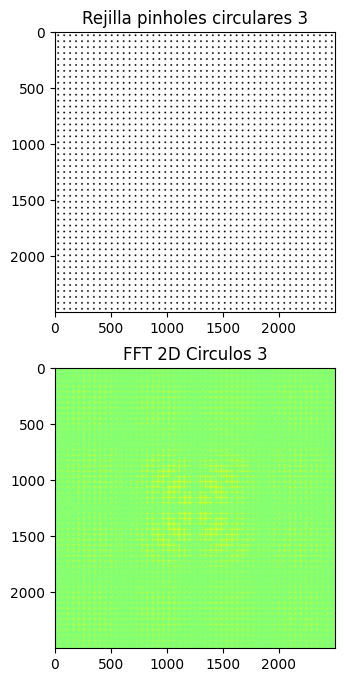

In [ ]:
img_prueba = cv2.imread(URL_ADAP(r'C:\Users\Felipe\Pictures\Optica_Proyecto\Peine_OF_1.png'), 0)
fft_prueba = np.fft.fftshift(np.fft.fft2(img_prueba))
espectro_pruebas = normalize_image(np.log(0.0001 + np.abs(fft_prueba)**2))

plt.figure(figsize = (4, 8))
plt.subplot(2, 1, 1)
plt.imshow(img_prueba, cmap = 'gray')
plt.title(f"Rejilla pinholes circulares 3")

plt.subplot(2, 1, 2)
plt.imshow(espectro_pruebas, cmap = 'jet')
plt.title('FFT 2D Circulos 3')

plt.show()

## Construyendo las imagenes por el metodo de la convolución:

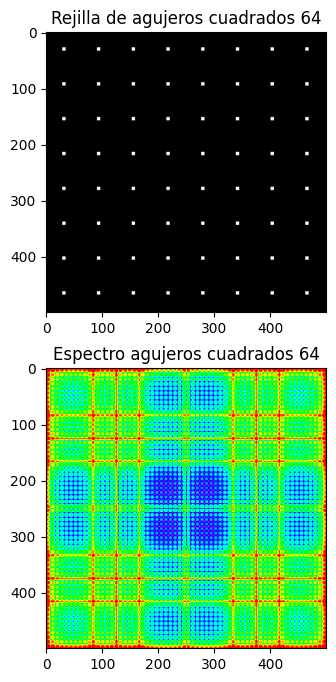

In [ ]:
n = 8

c_pixels = 500

Nx, Ny = c_pixels, c_pixels
Tx, Ty = int(Nx/n), int(Ny/n)
dx = int(c_pixels/((2*n)))

peine_c = np.zeros((Nx, Ny))
peine_c[dx::Tx, dx::Ty] = 1


Wx, Wy = 6, 6
pinhole_c = np.zeros((Tx, Ty))
pinhole_c[Tx//2 - Wy//2:Tx//2 + Wy//2, Ty//2 - Wx//2:Ty//2 + Wx//2] = 1

rejilla = convolve2d(peine_c, pinhole_c, mode="same")

espectro_c = fftshift(fft2(rejilla))
intensidad_espectro_c = np.log(0.0001 + np.abs(espectro_c)**2)

plt.figure(figsize = (4, 8))

plt.subplot(2, 1, 1)
plt.imshow(rejilla, cmap = 'gray')
plt.title(f"Rejilla de agujeros cuadrados {n**2}")

plt.subplot(2, 1, 2)
plt.imshow(intensidad_espectro_c, cmap = 'hsv')
plt.title(f"Espectro agujeros cuadrados {n**2}")

plt.show()

plt.imsave(r'C:\Users\Felipe\Pictures\Optica_Proyecto\Rejilla cuadrados.png', rejilla, cmap = 'gray_r')

## Transformada por un lente convergente

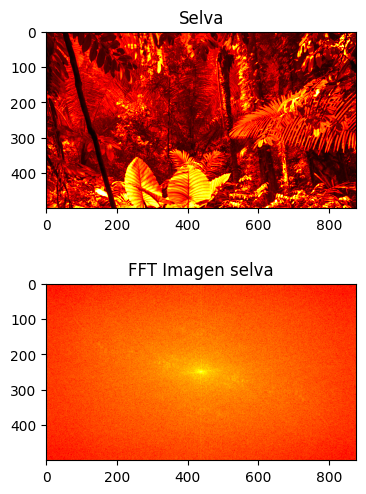

In [ ]:
selva = cv2.imread(URL_ADAP(r'C:\Users\Felipe\Pictures\Optica_Proyecto\Rainforest_5.jpg'), 0)
fft_selva = np.log(0.0001 + np.abs(fftshift(fft2(selva))**2))

plt.figure(figsize = (4, 6))

plt.subplot(2, 1, 1)
plt.imshow(selva, cmap = 'hot')
plt.title(f"Selva")

plt.subplot(2, 1, 2)
plt.imshow(np.abs(fft_selva), cmap = 'hot')
plt.title(f"FFT Imagen selva")

plt.show()

## Replicando el experimento de la formación de imagenes con la letra E

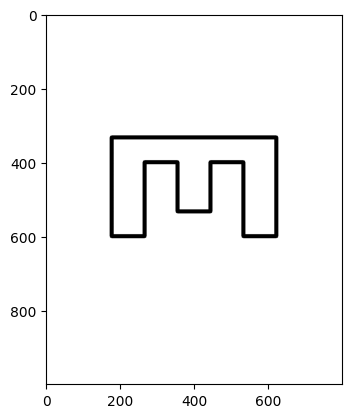

In [ ]:
# (y, x), (vertical, horizontal)
letra_E = np.zeros((1000, 800))
grosor_linea = 10

# Valor por unidad en eje
v = 88.889
h = 66.667

# Horizontales
cv2.line(letra_E, (int(2*v), int(5*h)), (int(2*v), int(9*h)), 1, grosor_linea)
cv2.line(letra_E, (int(7*v), int(5*h)), (int(7*v), int(9*h)), 1, grosor_linea)
cv2.line(letra_E, (int(3*v), int(6*h)), (int(3*v), int(9*h)), 1, grosor_linea)
cv2.line(letra_E, (int(4*v), int(6*h)), (int(4*v), int(8*h)), 1, grosor_linea)
cv2.line(letra_E, (int(5*v), int(6*h)), (int(5*v), int(8*h)), 1, grosor_linea)
cv2.line(letra_E, (int(6*v), int(6*h)), (int(6*v), int(9*h)), 1, grosor_linea)

# Verticales
cv2.line(letra_E, (int(2*v), int(5*h)), (int(7*v), int(5*h)), 1, grosor_linea)
cv2.line(letra_E, (int(2*v), int(9*h)), (int(3*v), int(9*h)), 1, grosor_linea)
cv2.line(letra_E, (int(3*v), int(6*h)), (int(4*v), int(6*h)), 1, grosor_linea)
cv2.line(letra_E, (int(4*v), int(8*h)), (int(5*v), int(8*h)), 1, grosor_linea)
cv2.line(letra_E, (int(5*v), int(6*h)), (int(6*v), int(6*h)), 1, grosor_linea)
cv2.line(letra_E, (int(6*v), int(9*h)), (int(7*v), int(9*h)), 1, grosor_linea)

plt.imshow(letra_E, cmap = 'gray_r')
plt.show()

plt.imsave(r'C:\Users\Felipe\Pictures\Optica_Proyecto\letra_E.png', letra_E, cmap = 'gray')

In [ ]:
print(f"Las dimensiones de la transmitancia de la letra E son: {np.shape(letra_E)}")

Las dimensiones de la transmitancia de la letra E son: (1000, 800)


In [ ]:
lam = 633.33 * u.nm

In [ ]:
def select_cmap_for_wavelength(wavelength_nm):
    """
    Selecciona un cmap adecuado basado en la longitud de onda.

    Parámetro:
        wavelength_nm (float): Longitud de onda en nanómetros (nm)

    Retorno:
        str: Nombre del cmap para el rango de longitud de onda
    """
    if wavelength_nm < 450:
        color_violeta = [(0, 0, 0),
                         (50/250, 0, 50/250),
                         (100/250, 0, 100/250),
                         (150/250, 0, 150/250),
                         (200/250, 0, 200/250),
                         (250/250, 0, 250/250)]
        return color_violeta

    elif 450 <= wavelength_nm < 495:
        color_azul = [(0, 0, 0),
                      (0, 0, 50/250),
                      (0, 0, 100/250),
                      (0, 0, 150/250),
                      (0, 0, 200/250),
                      (0, 0, 250/250)]
        return color_azul   # Azul

    elif 495 <= wavelength_nm < 570:
        color_verde = [(0, 0, 0),
                       (0, 50/250, 0),
                       (0, 100/250, 0),
                       (0, 150/250, 0),
                       (0, 200/250, 0),
                       (0, 250/250, 0)]
        return color_verde   # Verde

    elif 570 <= wavelength_nm < 590:
        color_naranja = [(0, 0, 0),
                       (50/250, 50/250, 0),
                       (100/250, 100/250, 0),
                       (150/250, 150/250, 0),
                       (200/250, 200/250, 0),
                       (250/250, 250/250, 0)]
        return color_naranja  # Naranja

    elif 590 <= wavelength_nm:
        color_rojo = [(0, 0, 0),
                       (0/250, 0, 0),
                       (0/250, 0, 0),
                       (0/250, 0, 0),
                       (100/250, 0, 0),
                       (250/250, 0, 0)]
        return color_rojo     # Rojo Claro

    else:
        return color_rojo # Rojo Oscuro para >620 nm

# Ejemplo de uso:
wavelength = lam * (1/(u.nm)) # Longitud de onda en nanómetros
cmap = select_cmap_for_wavelength(wavelength)

cmap_spectrum = LinearSegmentedColormap.from_list("spectrum", cmap, N=256)

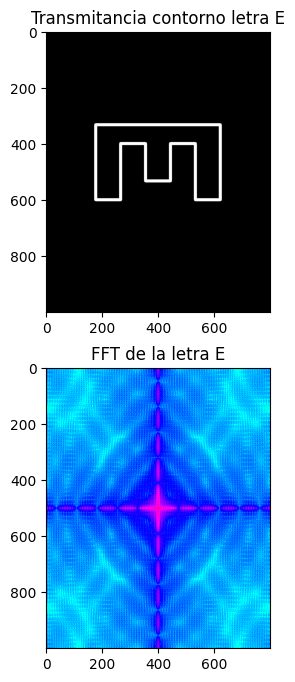

In [ ]:
img_letra_E = cv2.imread(URL_ADAP(r'C:\Users\Felipe\Pictures\Optica_Proyecto\letra_E.png'), 0)
espectro_letra_E = fftshift(fft2(img_letra_E))
intensidad_espectro_letra_E = np.log(0.0001 + np.abs(espectro_letra_E)**2)

plt.figure(figsize = (5, 8))

plt.subplot(2, 1, 1)
plt.imshow(img_letra_E, cmap = 'gray')
plt.title('Transmitancia contorno letra E')

plt.subplot(2, 1, 2)
plt.imshow(intensidad_espectro_letra_E, cmap = 'hsv')
plt.title('FFT de la letra E')

plt.show()

### Pupila rectangular amplia

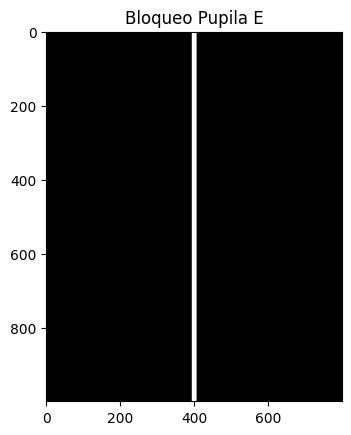

In [ ]:
pupila_E = np.ones((1000, 800))

cv2.rectangle(pupila_E, (0,0), (393, 1000), 0, -1)
cv2.rectangle(pupila_E, (407, 1000), (800, 0), 0, -1)

plt.imshow(pupila_E, cmap = 'gray')
plt.title('Bloqueo Pupila E')
plt.show()

### Pupila circular

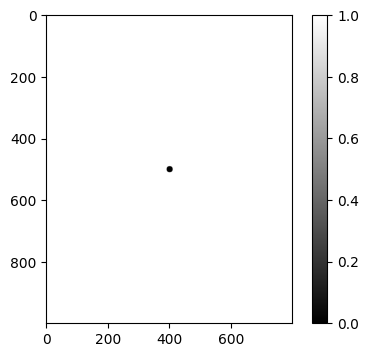

In [ ]:
pupila_circular_E = np.ones(np.shape(letra_E), dtype = "uint8")
coordx = int(np.shape(letra_E)[0]/2)
coordy = int(np.shape(letra_E)[1]/2)
cv2.circle(pupila_circular_E, (coordy, coordx), 10, 0, -1)

plt.figure(figsize = (5, 4))
plt.imshow(pupila_circular_E, cmap = 'gray')
plt.colorbar()
plt.show()

## Filtremos el espectro de la letra E de tal manera que quitemos las lineas horizontales

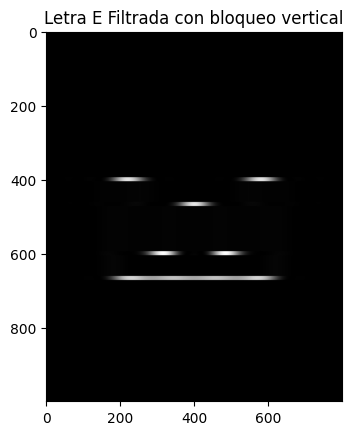

In [ ]:
letra_E_horizontales = fft2(pupila_E * espectro_letra_E)
intensidad_EH = np.abs(letra_E_horizontales)**2

plt.imshow(intensidad_EH, cmap = 'gray')
plt.title('Letra E Filtrada con bloqueo vertical')
plt.show()

## Patrón de Speckle

La parte mas retadora será construir la transmitancia que consista en una distribución aleatoria de pinholes con medios desfasadores de diferente magnitud.

Radios (x, y)[mm] : (1326, 720) ; con medio de fase: 6.239203010029329 rads
Radios (x, y)[mm] : (1577, 1317) ; con medio de fase: 5.0076986898221305 rads
Radios (x, y)[mm] : (764, 66) ; con medio de fase: 0.3707079331235956 rads
Radios (x, y)[mm] : (873, 1221) ; con medio de fase: 5.246459731494955 rads
Radios (x, y)[mm] : (1310, 896) ; con medio de fase: 1.6273449945595129 rads
Radios (x, y)[mm] : (1271, 172) ; con medio de fase: 4.379380159104172 rads
Radios (x, y)[mm] : (1496, 459) ; con medio de fase: 1.6964600329384885 rads
Radios (x, y)[mm] : (1846, 260) ; con medio de fase: 2.7834510910805568 rads
Radios (x, y)[mm] : (864, 1148) ; con medio de fase: 3.1730085801256913 rads
Radios (x, y)[mm] : (1813, 705) ; con medio de fase: 1.8032741831605414 rads
Radios (x, y)[mm] : (1378, 1270) ; con medio de fase: 4.542742977090841 rads
Radios (x, y)[mm] : (1243, 1181) ; con medio de fase: 4.7500880922277675 rads
Radios (x, y)[mm] : (516, 1598) ; con medio de fase: 2.243097154663112 rads
Rad

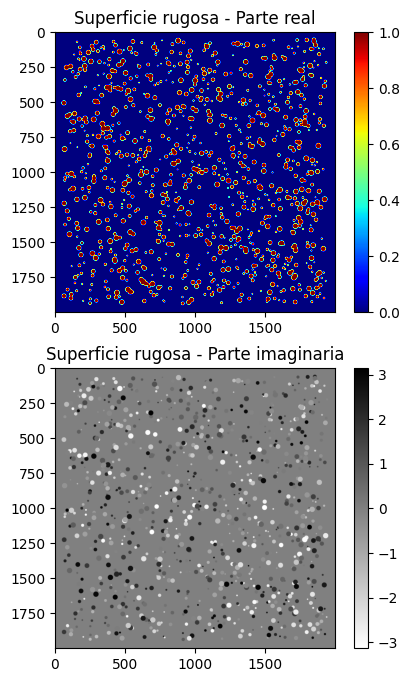

In [ ]:
superficie_speckle = np.zeros((2000, 2000))
superficie_fase = np.zeros((2000, 2000))

# Parametros
n_surfaces = 1000
r_max = 20
r_min = 5

# Definamos un par de intervalos
intervalo_fase = np.arange(0, 2 * np.pi, (2 * np.pi)/n_surfaces, dtype = 'float')
intervalo_espacio = np.arange(60, 1940)
intervalo_radio = np.arange(r_min, r_max, (r_max - r_min)/n_surfaces)

# Elegir elementos aleatorios del conjunto.
serie_fase = np.random.choice(intervalo_fase, n_surfaces, replace = False)
serie_espacio_o = np.random.choice(intervalo_espacio, n_surfaces, replace = False)  # Se escogen 2 para mezclar simplemente los centros
serie_espacio_u = np.random.choice(intervalo_espacio, n_surfaces, replace = False)
serie_radio = np.random.choice(intervalo_radio, n_surfaces, replace = False)

# Construir la superficie
for o in range(0, n_surfaces):

    cv2.circle(superficie_speckle, (serie_espacio_o[o], serie_espacio_u[o]), int(intervalo_radio[o]), 1, -1)
    cv2.circle(superficie_fase, (serie_espacio_o[o], serie_espacio_u[o]), int(intervalo_radio[o]), serie_fase[o], -1)

    print(f"Radios (x, y)[mm] : {(int(serie_espacio_o[o]), int(serie_espacio_u[o]))} ; con medio de fase: {serie_fase[o]} rads")

# Unificación del campo complejo
campo_speckle = superficie_speckle * np.exp(1j * superficie_fase)

plt.figure(figsize = (5, 8))

plt.subplot(2, 1, 1)
plt.imshow(intensidad_del_campo(campo_speckle), cmap = 'jet')
plt.title('Superficie rugosa - Parte real')
plt.colorbar()

plt.subplot(2, 1, 2)
plt.imshow(np.angle(campo_speckle), cmap = 'gray_r')
plt.title('Superficie rugosa - Parte imaginaria')
plt.colorbar()

plt.show()

plt.imsave(r'C:\Users\Felipe\Pictures\Optica_Proyecto\Superficie Rugosa.png', intensidad_del_campo(campo_speckle), cmap = 'gray')

## Patrón de speckle

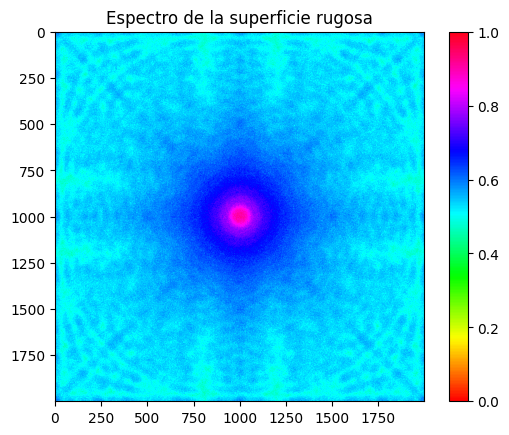

In [ ]:
fft_superficie_rugosa = fftshift(fft2(campo_speckle))
espectro_fft_SR = normalize_image(np.log(0.0001 + np.abs(fft_superficie_rugosa)**2))

plt.imshow(espectro_fft_SR, cmap = 'hsv')
plt.title('Espectro de la superficie rugosa')
plt.colorbar()
plt.show()

No es necesario hacer proceso de contraste de fase dado que la imagen es visible. Recordar, ademas, que siempre tendremos disponible el github con mis avances.

In [ ]:
print(f"Forma de la matriz del campo: {np.shape(campo_speckle)}")

Forma de la matriz del campo: (2000, 2000)


## Propagando una onda plana que atraviesa la rendija anterior

### Utilizando el metodo de propagación por el espectro angular

In [ ]:
xp = np.shape(campo_speckle)[0]
yp = np.shape(campo_speckle)[1]

l_planex = 7.0656   # mm
l_planey = 7.0656   # mm

x_pea = np.linspace(0, l_planex, xp)
y_pea = np.linspace(0, l_planey, yp)

xv_pea, yv_pea = np.meshgrid(x_pea, y_pea)

In [ ]:
lam = 633e-6  # mm

Recordar que desde el siguiente bloque de comando podemos cambiar, solo cambiando el signo, si es propagación desde o hacia un foco.

## PEA

In [ ]:
def compute_A(UT, xv, yv, lam, z):
    A = fft2(UT)         # Campo U
    kx = 2 * np.pi * fftfreq(len(x_pea), np.diff(x_pea)[0])
    ky = 2 * np.pi * fftfreq(len(y_pea), np.diff(y_pea)[0])
    kxv, kyv = np.meshgrid(kx, ky)
    k = 2 * np.pi/lam
    return ifft2(A*np.exp(1j*z*np.sqrt(k**2-kxv**2-kyv**2)))

Propagando el campo:

In [ ]:
z_pea_speckle = 200

In [ ]:
propagacion_speckle = compute_A(campo_speckle, xv_pea, yv_pea, lam, z_pea_speckle)

Mostrando el resultado de la propagación, no usamos otro codigo pues, como imagen, no se puede exportar la información de la fase.

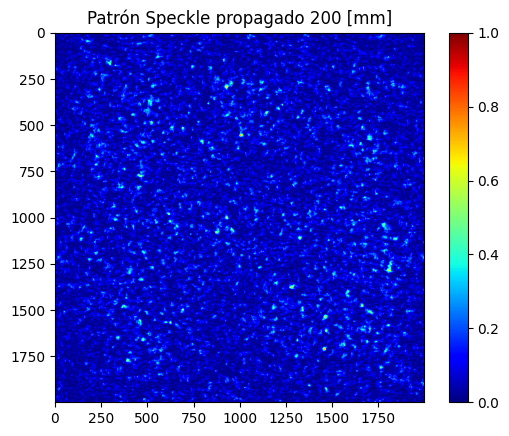

In [ ]:
spectrum_intensity_Speckle = normalize_image(intensidad_del_campo(propagacion_speckle))

plt.imshow(spectrum_intensity_Speckle, cmap = 'jet')
plt.title(f"Patrón Speckle propagado {z_pea_speckle} [mm]")
plt.colorbar()
plt.show()

## Marca de intensidad transversal

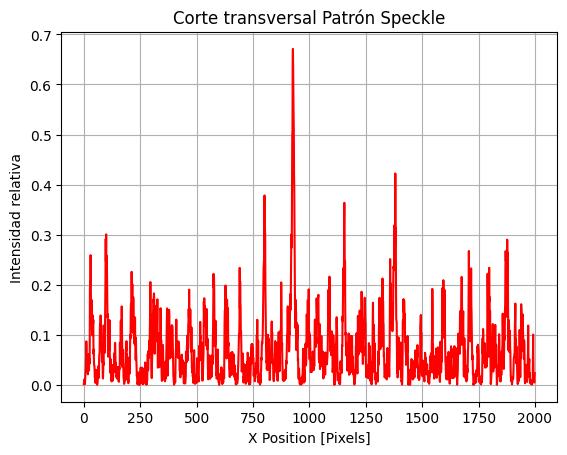

In [ ]:
plt.plot(spectrum_intensity_Speckle[1000], color = 'red')
plt.grid()
plt.xlabel('X Position [Pixels]')
plt.ylabel('Intensidad relativa')
plt.title('Corte transversal Patrón Speckle')
plt.show()

## Corte transversal del espectro de Fourier de la superficie rugosa

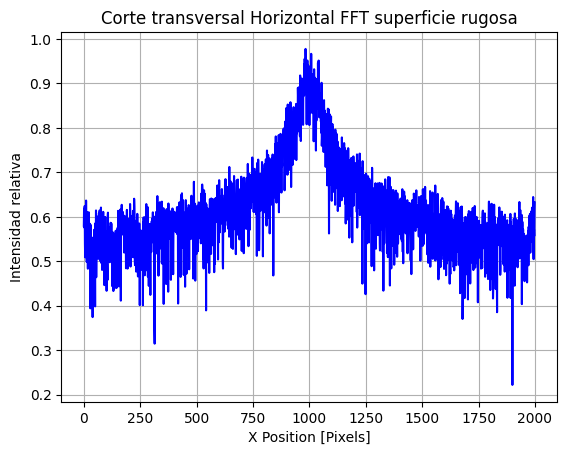

In [ ]:
plt.plot(espectro_fft_SR[1000], color = 'blue')
plt.grid()
plt.xlabel('X Position [Pixels]')
plt.ylabel('Intensidad relativa')
plt.title('Corte transversal Horizontal FFT superficie rugosa')
plt.show()